In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# import data , units = mW/(m^2 nm)

columns = ['wavelength','DHI (direct)','DDHI (diffused)','reflected','uavg1','uavg2','uavg']

z1 = pd.read_csv(r'C:\Users\nadia\Desktop\report1\libRadtran data\1.out', delimiter=r"\s+", names=columns)
z10 = pd.read_csv(r'C:\Users\nadia\Desktop\report1\libRadtran data\10.out', delimiter=r"\s+", names=columns)
z20 = pd.read_csv(r'C:\Users\nadia\Desktop\report1\libRadtran data\20.out', delimiter=r"\s+", names=columns)
z40 = pd.read_csv(r'C:\Users\nadia\Desktop\report1\libRadtran data\40.out', delimiter=r"\s+", names=columns)
z60 = pd.read_csv(r'C:\Users\nadia\Desktop\report1\libRadtran data\60.out', delimiter=r"\s+", names=columns)
z80 = pd.read_csv(r'C:\Users\nadia\Desktop\report1\libRadtran data\80.out', delimiter=r"\s+", names=columns)

In [52]:
z1

,wavelength,DHI (direct),DDHI (diffused),reflected,uavg1,uavg2,uavg
0,300.0,5.607888,3.984873,3.504307e-16,0.446329,0.598730,5.577277e-17
1,310.0,88.942160,65.203480,-1.206311e-14,7.078870,10.285580,-3.198261e-15
2,320.0,242.306200,159.796400,-1.972058e-14,19.285050,25.945660,-5.535622e-15
3,330.0,464.388900,269.910100,-1.184259e-13,36.960520,44.958970,-2.422810e-14
4,340.0,474.054500,233.244200,1.247416e-13,37.729800,39.658420,3.999814e-14
...,...,...,...,...,...,...,...
366,3960.0,8.087709,0.000127,6.868455e-21,0.643698,0.000025,2.586417e-21
367,3970.0,8.001747,0.000123,-6.070878e-21,0.636856,0.000024,-2.286078e-21
368,3980.0,7.877601,0.000119,-6.061386e-21,0.626975,0.000023,-2.282504e-21
369,3990.0,7.756113,0.000116,1.871200e-21,0.617306,0.000022,7.046279e-22


In [53]:
# actinic flux

for file in [z1, z10, z20, z40, z60, z80]:
    file['flux'] = file['uavg']*4*np.pi
    file['GHI (global)'] = file['DHI (direct)'] + file['DDHI (diffused)']

In [54]:
z20.head()

,wavelength,DHI (direct),DDHI (diffused),reflected,uavg1,uavg2,uavg,flux,GHI (global)
0,300.0,3.953948,3.116686,-2.221641e-16,0.334838,0.470337,-8.365915e-17,-1.051292e-15,7.070634
1,310.0,74.286190,59.863070,-2.038131e-14,6.290894,9.502486,-5.658462e-15,-7.110633e-14,134.149260
2,320.0,211.068800,152.318700,2.707074e-14,17.874270,24.919530,8.303433e-15,1.043440e-13,363.387500
3,330.0,413.704500,262.246700,-5.621025e-13,35.034390,44.066710,-1.085605e-13,-1.364211e-12,675.951200
4,340.0,425.324900,227.535100,-1.046829e-13,36.018460,39.077330,-1.616946e-14,-2.031914e-13,652.860000


In [57]:
def plot(file, rad, ylabel, title):
    plt.plot(file['wavelength'], file[rad], markersize = 1)
    plt.xlabel("wavelegth (nm)",fontsize = 14)
    plt.ylabel(ylabel,fontsize = 14)
    plt.title(label=title,fontsize = 15)
    plt.grid()

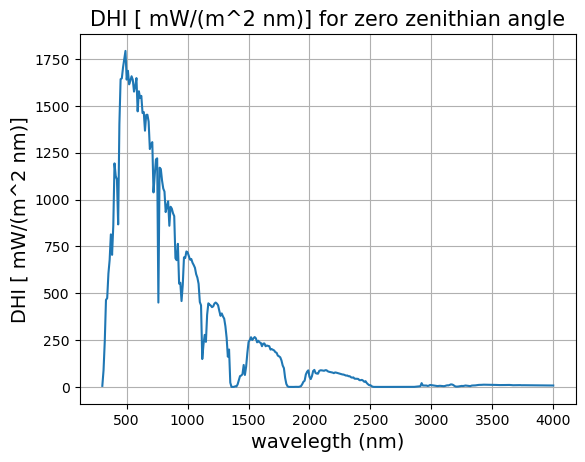

In [69]:
# plotting the dirrect, diffuse and global irradiances for z=0

plot(z1, 'DHI (direct)', "DHI [ mW/(m^2 nm)]", "DHI [ mW/(m^2 nm)] for zero zenithian angle")

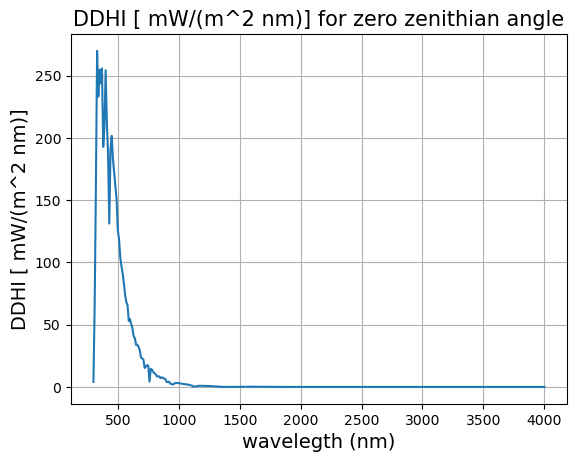

In [66]:
plot(z1, 'DDHI (diffused)', "DDHI [ mW/(m^2 nm)]", "DDHI [ mW/(m^2 nm)] for zero zenithian angle")

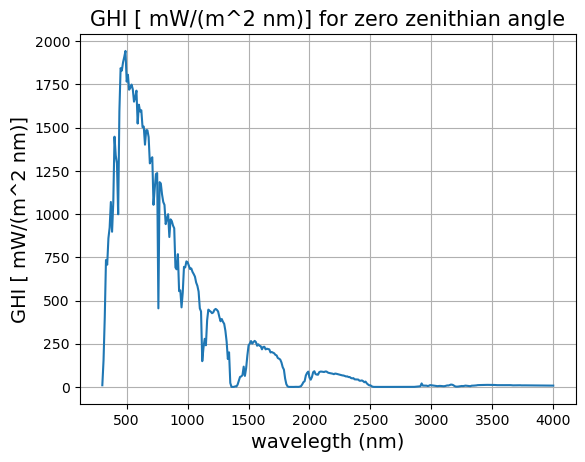

In [71]:
plot(z1, 'GHI (global)', "GHI [ mW/(m^2 nm)]", "GHI [ mW/(m^2 nm)] for zero zenithian angle")

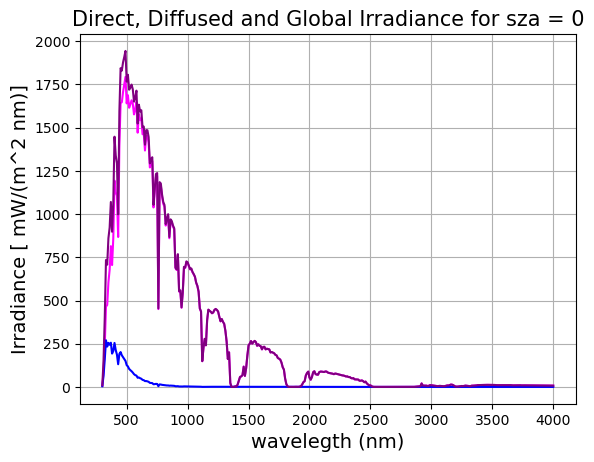

In [84]:
#combined plot for fun
plt.plot(z1['wavelength'], z1['DHI (direct)'], markersize = 1, color ='magenta')
plt.plot(z1['wavelength'], z1['DDHI (diffused)'], markersize = 1, color = "blue")
plt.plot(z1['wavelength'], z1['GHI (global)'], markersize = 1, color = 'purple')
plt.xlabel("wavelegth (nm)",fontsize = 14)
plt.ylabel("Irradiance [ mW/(m^2 nm)]",fontsize = 14)
plt.title(label="Direct, Diffused and Global Irradiance for sza = 0",fontsize = 15)
plt.grid()

In [108]:
# import extraterrestrial data 

kurudz = pd.read_fwf(r'C:\Users\nadia\Desktop\MSc\Radiation and Atmosphere Interaction\report0\arxeia\kurudz_1.0nm.dat', delimiter='\t', header=None, encoding='latin1',sep='\t', skiprows = 11)

kurudz[0] = kurudz[0].str.strip()
kurudz[['wavelength','radiation']] = kurudz[0].str.split(' ', n=1, expand=True)
kurudz[['wavelength','radiation']] = kurudz[['wavelength','radiation']].astype(float)
kurudz = kurudz.drop(kurudz[kurudz.wavelength>4000].index)
kurudz = kurudz.drop(kurudz[kurudz.wavelength<300].index
kurudz = kurudz.reset_index(drop = True)

kurudz_new_wave = kurudz.groupby(kurudz.index//20)['wavelength'].mean().reset_index(drop=True)
kurudz_new_rad = kurudz.groupby(kurudz.index//20)['radiation'].mean().reset_index(drop=True)

In [112]:
kurudz

,0,wavelength,radiation
0,250 6.352968e+01,250.0,63.529680
1,251 4.395971e+01,251.0,43.959710
2,252 2.909898e+01,252.0,29.098980
3,253 3.198302e+01,253.0,31.983020
4,254 4.187484e+01,254.0,41.874840
...,...,...,...
3746,3996 8.539276e+00,3996.0,8.539276
3747,3997 8.761329e+00,3997.0,8.761329
3748,3998 8.712255e+00,3998.0,8.712255
3749,3999 8.546748e+00,3999.0,8.546748
